In [1]:
import os
os.environ['ZFIT_DISABLE_TF_WARNINGS'] = '1'
# numpy is used for generating, storing, and plotting data
import numpy as np
# zfit will be used for the parameter estimation in the following
import pandas
import uproot


# in order to visualise the results of the computation, we use matplotlib
import matplotlib as mpl
if os.path.exists('lhcbStylerc'):
    mpl.rc_file('lhcbStylerc') # some plotting presets i usually use, you can find them in the git-repo
import socket
#if 'jupyter-schmitse-' in socket.gethostname():
#    mpl.rcParams['text.usetex'] = False # no latex on binder
    
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.LHCb2)
#plt.rcParams['text.usetex'] = True
# for histograms boost has an easy api and is very fast
import hist
# for statistical distributions we can use a lot from scipy
from scipy import stats

## File import, data processing
 

In [2]:



pathOmega="/eos/lhcb/user/p/pgaigne/STEP3/Run2/Omegaccpst-MC-Run2-MCMatch-clone-duplicate.root"

thresholdOmega = 4115.1

pathXicc="/eos/lhcb/user/p/pgaigne/STEP3/Run2/Xiccpst-MC-Run2-MCMatch-clone-duplicate.root"
thresholdXicc = 3761


branches = ["Xicc_M_DTF_Lc_PV", "Lc_M", "Pi_ProbNNk", "Pi_ProbNNpi", "C_KaonDTF_K_PT", "Pi_PT", "Xicc_TMVA_BDTXicc", "C_TRUEP_E", "C_TRUEP_X", "C_TRUEP_Y", "C_TRUEP_Z"]
    
with uproot.open(pathOmega) as file:
    treeO = file['DecayTree']
    data_Omega = treeO.arrays( library='pd').reset_index(level=1, drop=True).drop_duplicates(subset=['C_ETA','C_LOKI_IPCHI2'])
       


fileX =  uproot.open(pathXicc)
treeX = fileX['DecayTree']
data_Xicc = treeX.arrays( library='pd').reset_index(level=1, drop=True).drop_duplicates(subset=['C_ETA','C_LOKI_IPCHI2'])
fileX.close() 


In [3]:
cut = "(abs(C_TRUEID)==4432&abs(Pi_TRUEID)==321&abs(Pi_MC_MOTHER_ID)==4432&abs(Xicc_TRUEID)==4422&abs(Xicc_MC_MOTHER_ID)==4432&abs(Lc_TRUEID)==4122&abs(LcP_TRUEID)==2212&abs(LcPi_TRUEID)==211&abs(LcK_TRUEID)==321&(abs(LcP_MC_MOTHER_ID)==4122|abs(LcP_MC_GD_MOTHER_ID)==4122)&(abs(LcK_MC_MOTHER_ID)==4122|abs(LcK_MC_GD_MOTHER_ID)==4122)&(abs(LcPi_MC_MOTHER_ID)==4122|abs(LcPi_MC_GD_MOTHER_ID)==4122)&abs(XiccPi1_TRUEID)==211&abs(XiccPi1_MC_MOTHER_ID)==4422&abs(XiccPi1_MC_GD_MOTHER_ID)==4432&abs(XiccPi2_TRUEID)==211&abs(XiccPi2_MC_MOTHER_ID)==4422&abs(XiccPi2_MC_GD_MOTHER_ID)==4432&abs(XiccK_TRUEID)==321&abs(XiccK_MC_MOTHER_ID)==4422&abs(XiccK_MC_GD_MOTHER_ID)==4432)"
data_Omega_cut = data_Omega.query(cut+"&abs(Xicc_M_DTF_Lc_PV-3621)<15 & abs(Lc_M-2288)<18 & Pi_ProbNNk>0.1 & C_KaonDTF_K_PT>200 & Xicc_TMVA_BDTXicc>0.07")

cut = "(abs(C_TRUEID)==4412&abs(Pi_TRUEID)==211&abs(Pi_MC_MOTHER_ID)==4412&abs(Xicc_TRUEID)==4422&abs(Xicc_MC_MOTHER_ID)==4412&abs(Lc_TRUEID)==4122&abs(LcP_TRUEID)==2212&abs(LcPi_TRUEID)==211&abs(LcK_TRUEID)==321&(abs(LcP_MC_MOTHER_ID)==4122|abs(LcP_MC_GD_MOTHER_ID)==4122)&(abs(LcK_MC_MOTHER_ID)==4122|abs(LcK_MC_GD_MOTHER_ID)==4122)&(abs(LcPi_MC_MOTHER_ID)==4122|abs(LcPi_MC_GD_MOTHER_ID)==4122)&abs(XiccPi1_TRUEID)==211&abs(XiccPi1_MC_MOTHER_ID)==4422&abs(XiccPi1_MC_GD_MOTHER_ID)==4412&abs(XiccPi2_TRUEID)==211&abs(XiccPi2_MC_MOTHER_ID)==4422&abs(XiccPi2_MC_GD_MOTHER_ID)==4412&abs(XiccK_TRUEID)==321&abs(XiccK_MC_MOTHER_ID)==4422&abs(XiccK_MC_GD_MOTHER_ID)==4412)"   
data_Xicc_cut = data_Xicc.query(cut+"&abs(Xicc_M_DTF_Lc_PV-3621)<15 & abs(Lc_M-2288)<18  & Pi_ProbNNpi>0.1 & Pi_PT>200 & Xicc_TMVA_BDTXicc>0.07")

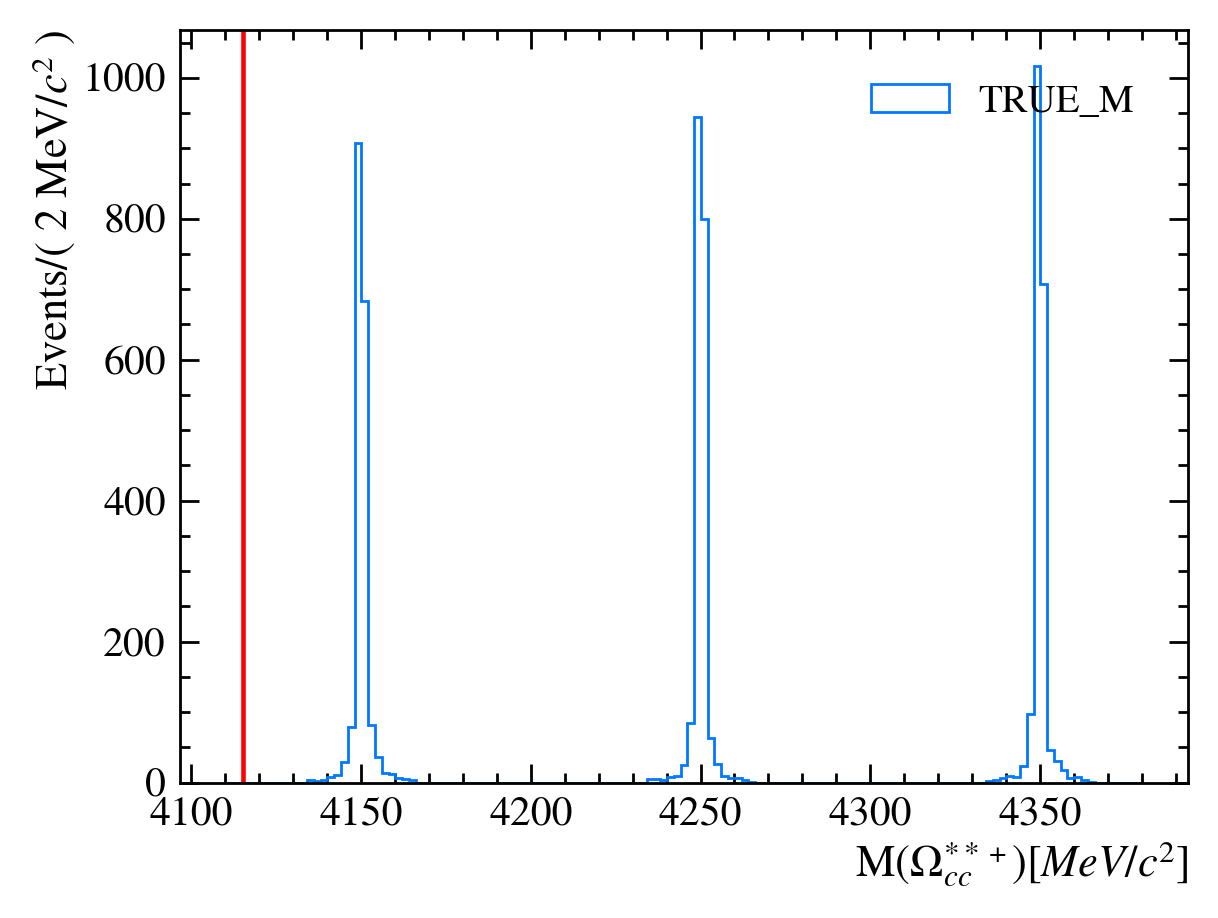

In [4]:
data = data_Omega_cut

fig, ax = plt.subplots()
ax.hist(np.sqrt(data.C_TRUEP_E**2-(data.C_TRUEP_X**2+data.C_TRUEP_Y**2+data.C_TRUEP_Z**2)),range=[thresholdOmega-5,thresholdOmega+265], bins=135, histtype ='step', label=r'TRUE_M')
# ax.set_xlabel(r'$\Delta BDT$')
plt.axvline(x=thresholdOmega,color='red')
ax.set_xlabel('M$(\Omega_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 2 MeV/$c^2$ )')
ax.legend()

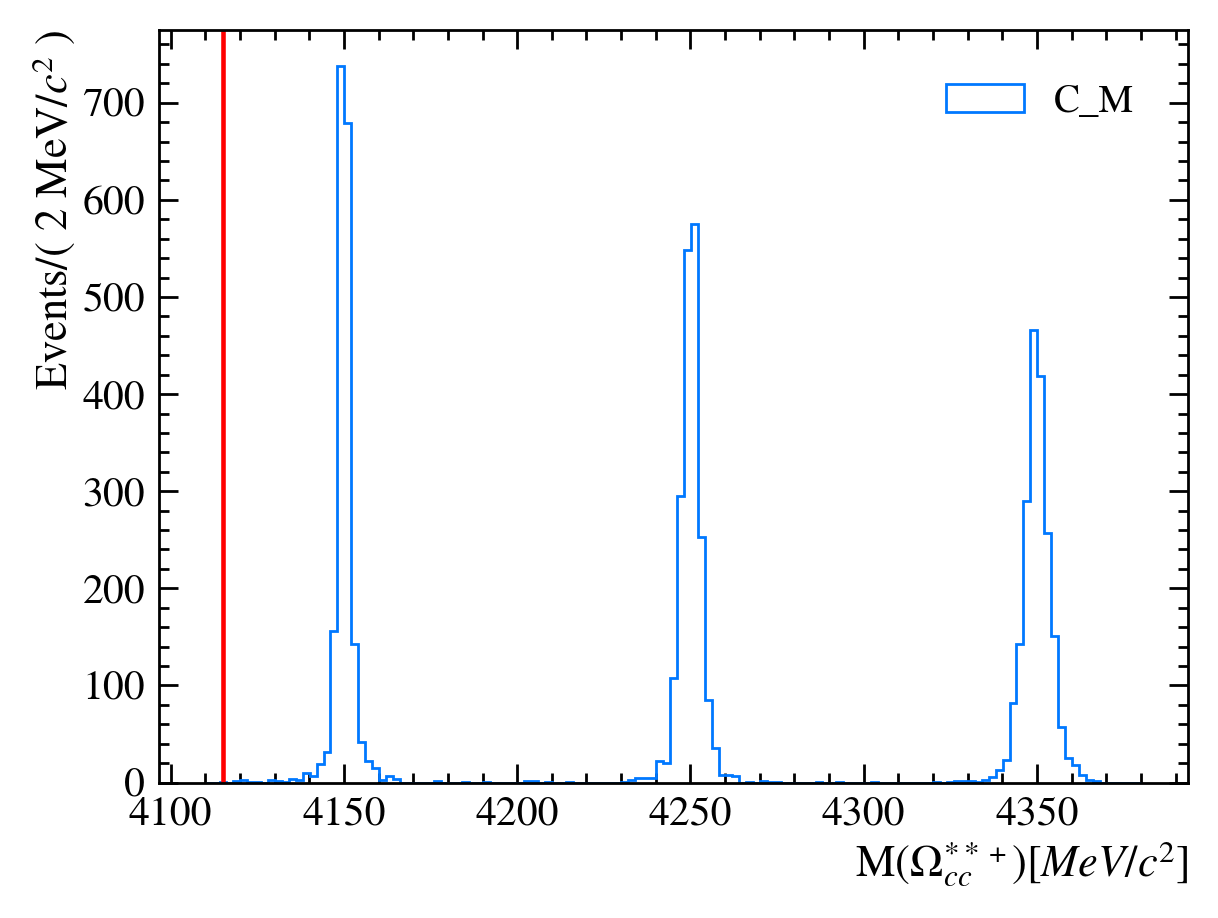

In [5]:
data = data_Omega_cut

fig, ax = plt.subplots()
ax.hist(data.C_KaonDTF_C_M,range=[thresholdOmega-5,thresholdOmega+265], bins=135, histtype ='step', label=r'C_M')
# ax.set_xlabel(r'$\Delta BDT$')
plt.axvline(x=thresholdOmega,color='red')
ax.set_xlabel('M$(\Omega_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 2 MeV/$c^2$ )')
ax.legend()

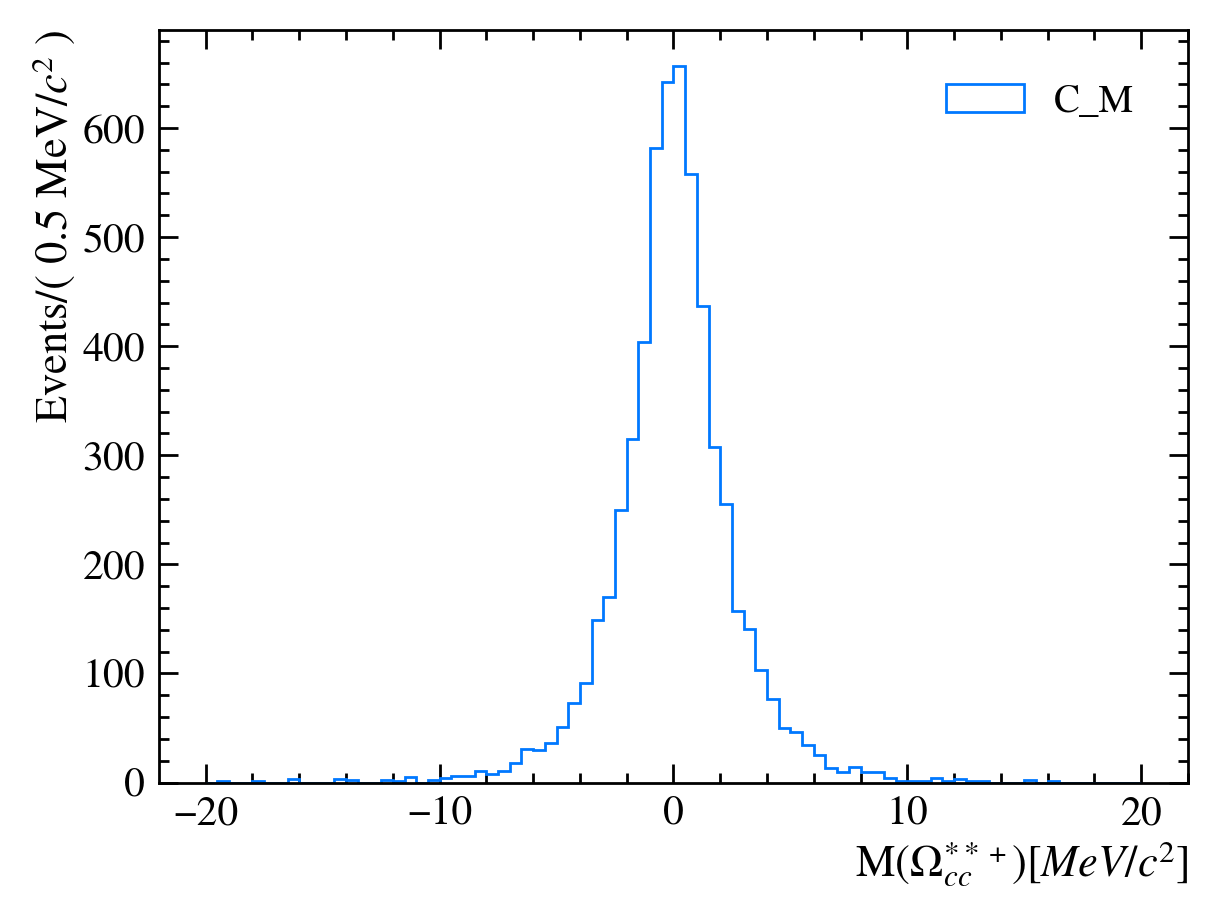

In [6]:
data = data_Omega_cut

fig, ax = plt.subplots()
ax.hist(data.C_KaonDTF_C_M-np.sqrt(data.C_TRUEP_E**2-(data.C_TRUEP_X**2+data.C_TRUEP_Y**2+data.C_TRUEP_Z**2)),range=[-20,20], bins=80, histtype ='step', label=r'C_M')
# ax.set_xlabel(r'$\Delta BDT$')
# plt.axvline(x=thresholdOmega,color='red')
ax.set_xlabel('M$(\Omega_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 0.5 MeV/$c^2$ )')
ax.legend()

In [7]:
print(f"Number of candidates Loose : {len(data_Omega_cut)} and number of candidates Tight {len(data_Omega_cut.query('Xicc_TMVA_BDTXicc>0.17'))}")

Number of candidates Loose : 5877 and number of candidates Tight 4122


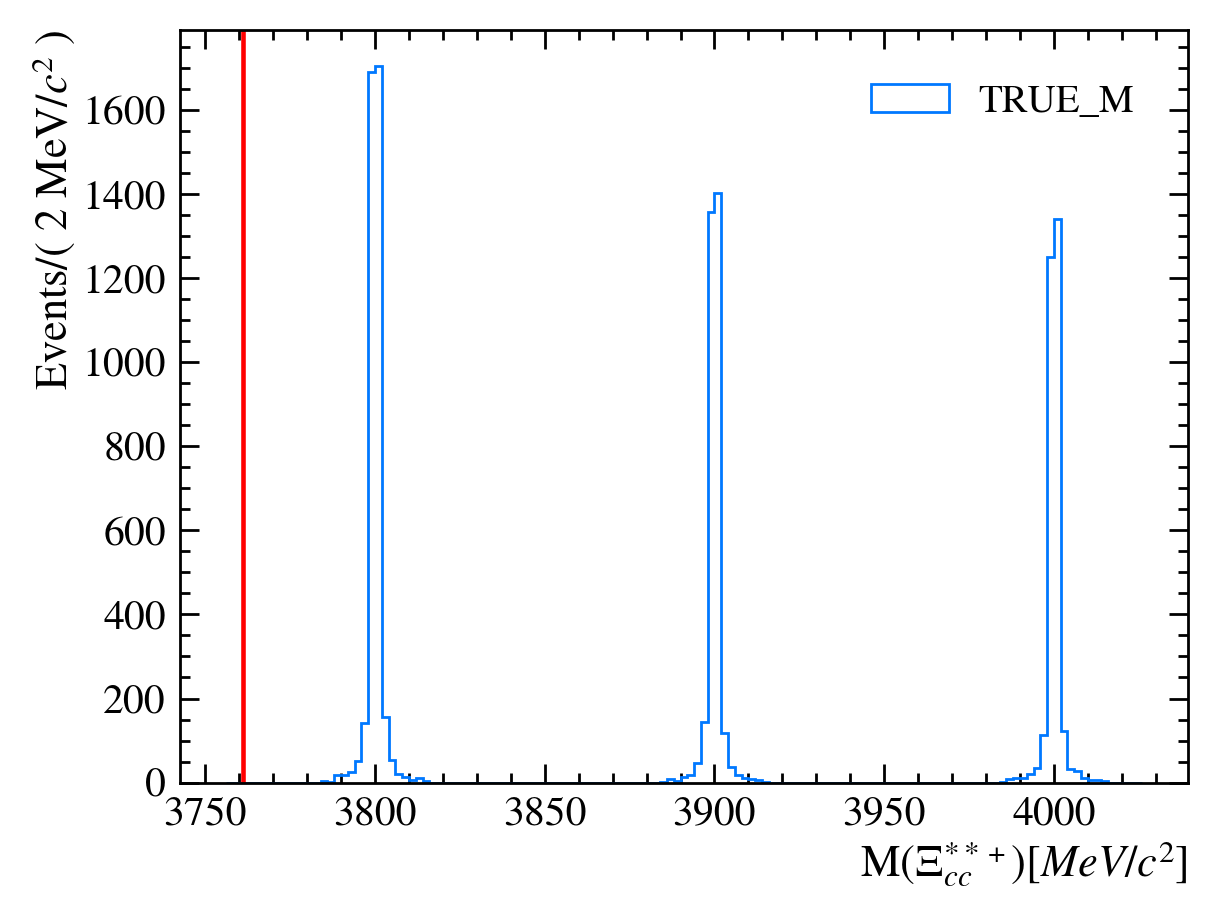

In [8]:
data = data_Xicc_cut

fig, ax = plt.subplots()
ax.hist(np.sqrt(data.C_TRUEP_E**2-(data.C_TRUEP_X**2+data.C_TRUEP_Y**2+data.C_TRUEP_Z**2)),range=[thresholdXicc-5,thresholdXicc+265], bins=135, histtype ='step', label=r'TRUE_M')
# ax.set_xlabel(r'$\Delta BDT$')
ax.set_xlabel('M$(\Xi_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 2 MeV/$c^2$ )')
plt.axvline(x=thresholdXicc,color='red')
ax.legend()

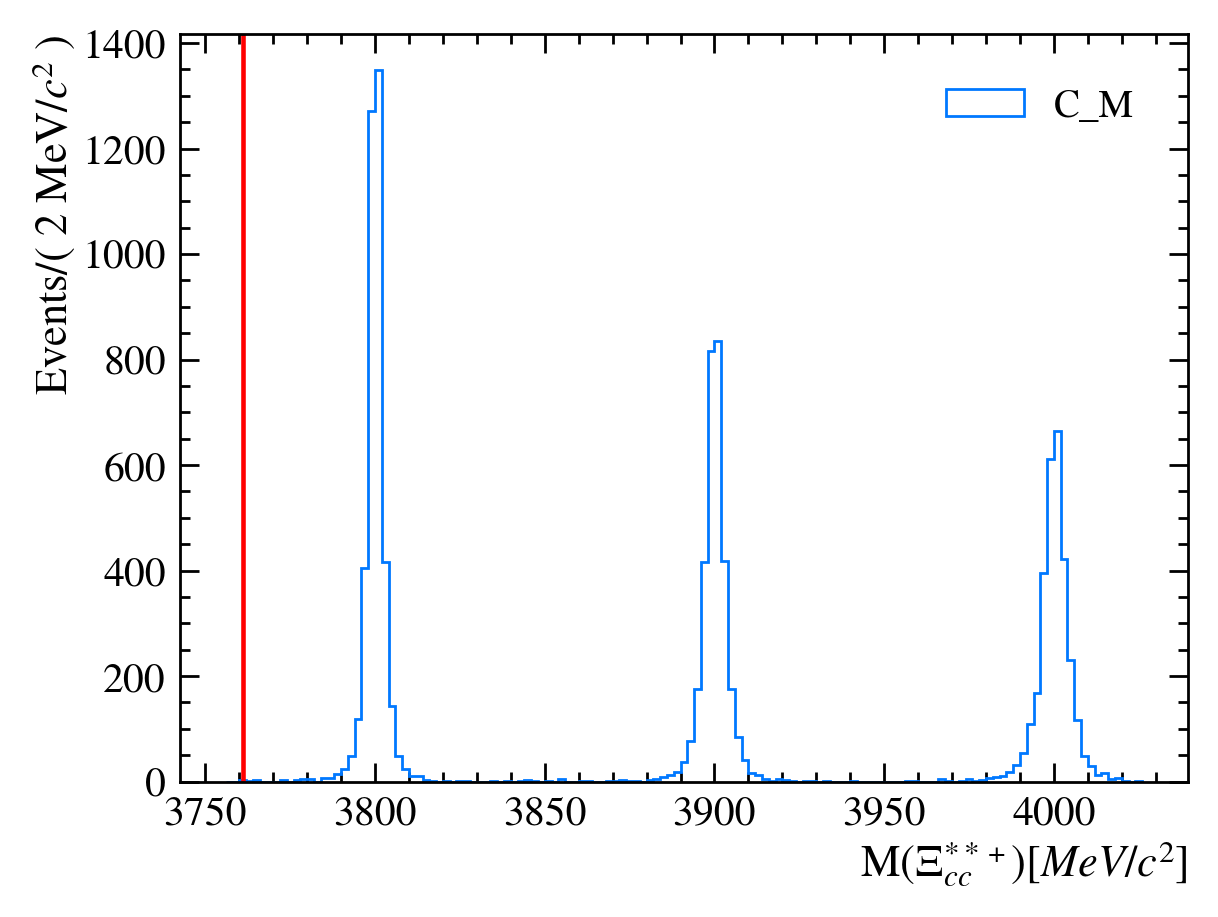

In [9]:
data = data_Xicc_cut

fig, ax = plt.subplots()
ax.hist(data.C_M_DTF_Xicc_PV,range=[thresholdXicc-5,thresholdXicc+265], bins=135, histtype ='step', label=r'C_M')
# ax.set_xlabel(r'$\Delta BDT$')
ax.set_xlabel('M$(\Xi_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 2 MeV/$c^2$ )')
plt.axvline(x=thresholdXicc,color='red')
ax.legend()

In [10]:
print(f"Number of candidates Loose : {len(data_Xicc_cut)} and number of candidates Tight {len(data_Xicc_cut.query('Xicc_TMVA_BDTXicc>0.17'))}")

Number of candidates Loose : 10115 and number of candidates Tight 7216


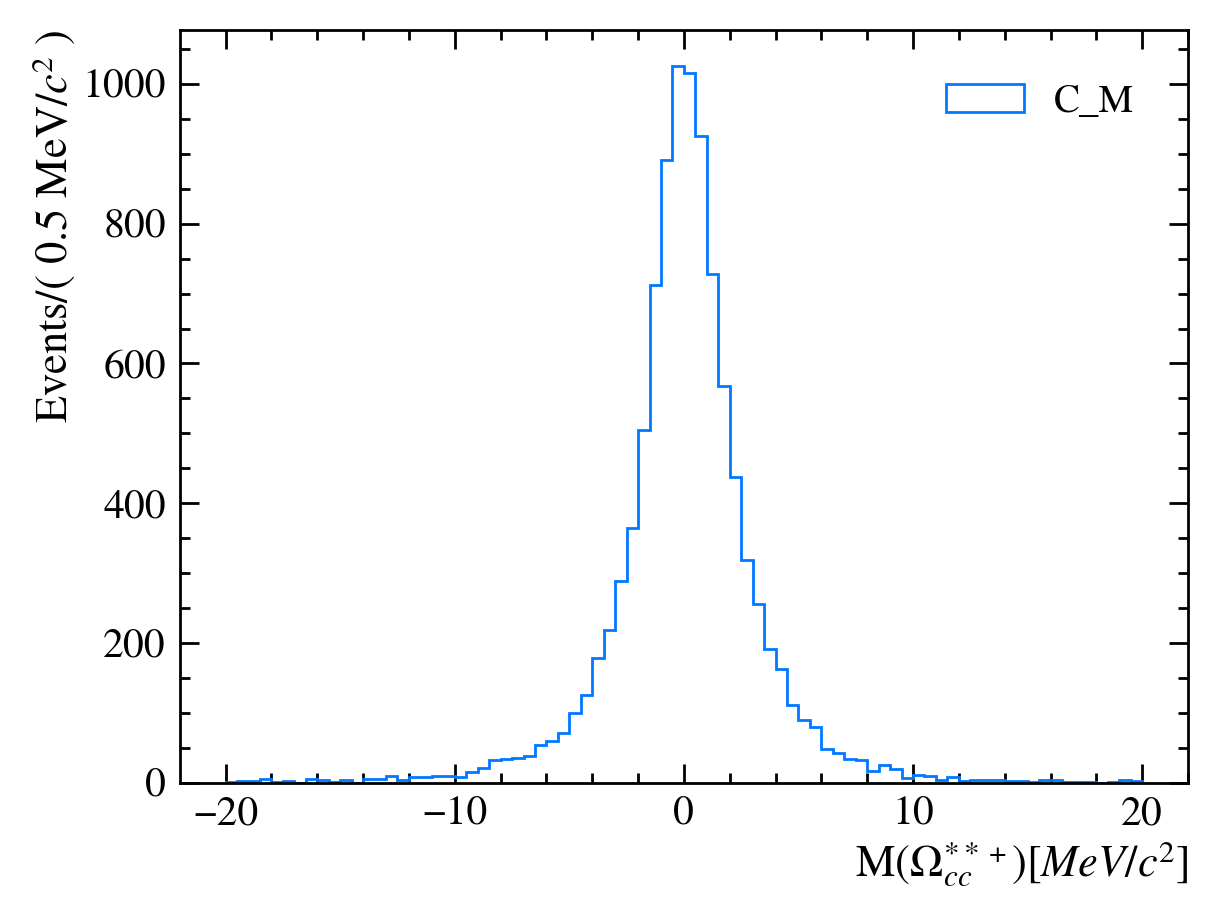

In [11]:
data = data_Xicc_cut

fig, ax = plt.subplots()
ax.hist(data.C_M_DTF_Xicc_PV-np.sqrt(data.C_TRUEP_E**2-(data.C_TRUEP_X**2+data.C_TRUEP_Y**2+data.C_TRUEP_Z**2)),range=[-20,20], bins=80, histtype ='step', label=r'C_M')
# ax.set_xlabel(r'$\Delta BDT$')
# plt.axvline(x=thresholdOmega,color='red')
ax.set_xlabel('M$(\Omega_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 0.5 MeV/$c^2$ )')
ax.legend()

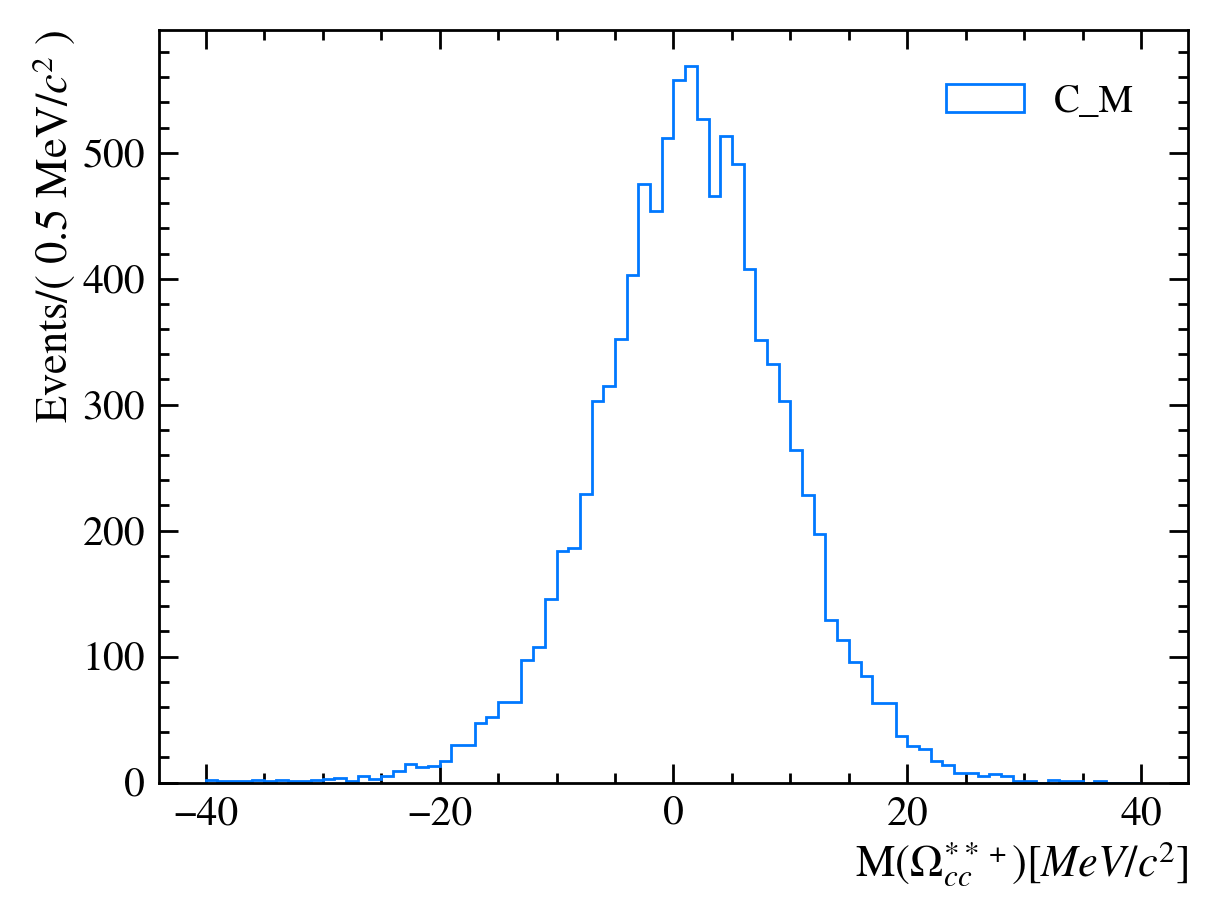

In [14]:
data = data_Xicc_cut

fig, ax = plt.subplots()
ax.hist(data.C_M_DTF_PV-np.sqrt(data.C_TRUEP_E**2-(data.C_TRUEP_X**2+data.C_TRUEP_Y**2+data.C_TRUEP_Z**2)),range=[-40,40], bins=80, histtype ='step', label=r'C_M')
# ax.set_xlabel(r'$\Delta BDT$')
# plt.axvline(x=thresholdOmega,color='red')
ax.set_xlabel('M$(\Omega_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 0.5 MeV/$c^2$ )')
ax.legend()

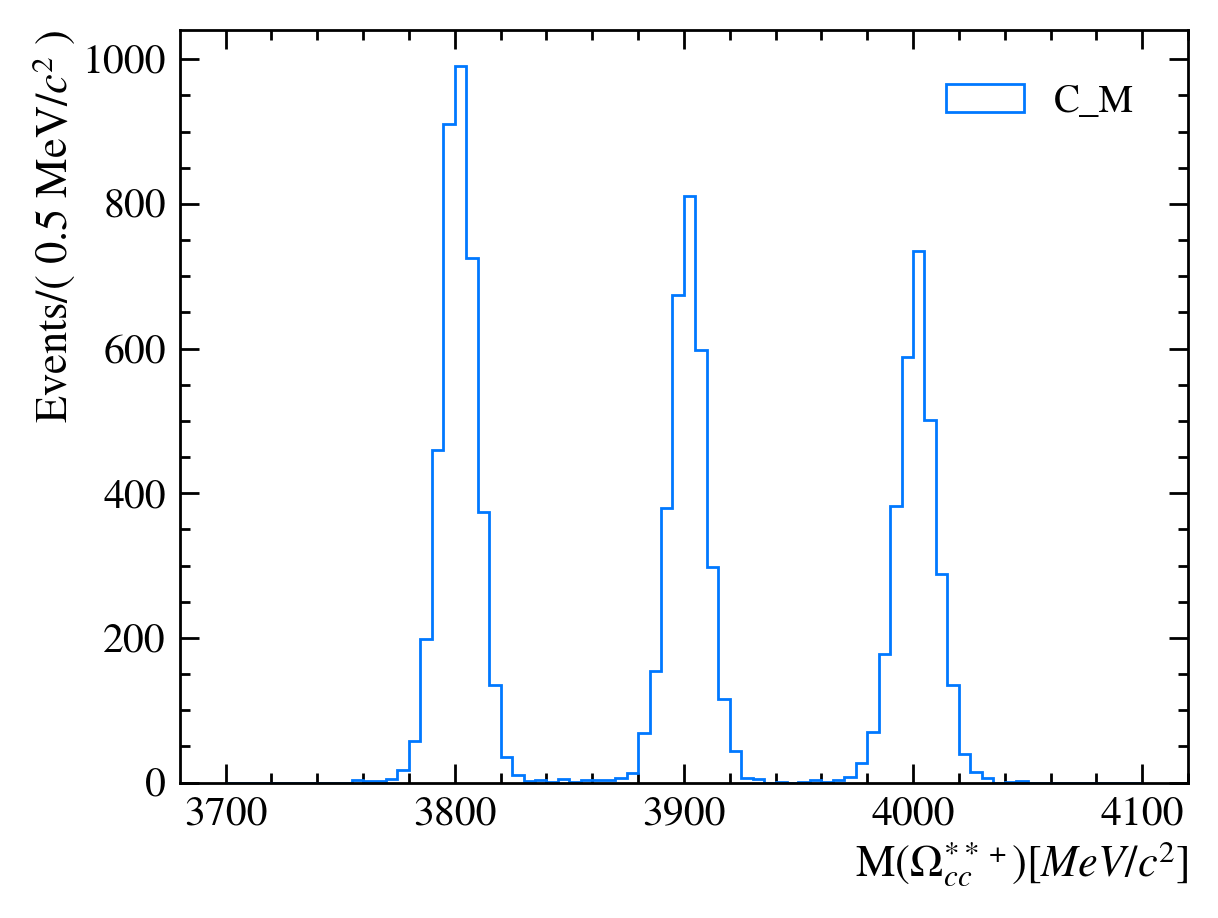

In [13]:
data = data_Xicc_cut

fig, ax = plt.subplots()
ax.hist(data.C_M_DTF_PV,range=[3700,4100], bins=80, histtype ='step', label=r'C_M')
# ax.set_xlabel(r'$\Delta BDT$')
# plt.axvline(x=thresholdOmega,color='red')
ax.set_xlabel('M$(\Omega_{cc}^{**+})[MeV/c^2]$')
ax.set_ylabel(f'Events/( 0.5 MeV/$c^2$ )')
ax.legend()